In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import re 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [77]:
df=pd.read_csv('secondtry.csv',encoding='latin-1')

In [78]:
df.GDP_usd_millions=df.GDP_usd_millions.str.replace(',','')
df.GDP_percapita_usd=df.GDP_percapita_usd.str.replace(',','')

In [79]:
df['GDP_percapita_usd']=pd.to_numeric(df['GDP_percapita_usd'],errors='coerce')
df['GDP_usd_millions']=pd.to_numeric(df['GDP_usd_millions'],errors='coerce')

In [80]:
df.sort_values(by='GDP_usd_millions',ascending=[False])

,City,Country,AllBuildings,100m+,150m+,200m+,300m+,400+,500+,600+,TelecomTowers,AllStructures,Province,GDP_usd_millions,GDP_percapita_usd,CountryGDPPerCapita,ProvinceGDP
1,New York City,United States,1549,861,281,80,30,8,1,0.0,2.0,1557.0,NaN,1718200.0,84557.00,NaN,NaN
27,Mumbai,India,143,81,44,6,7,1,0,0.0,1.0,144.0,NaN,1400000.0,3097.00,NaN,NaN
41,Los Angeles,United States,108,73,26,12,2,0,0,0.0,0.0,108.0,NaN,1048600.0,78523.00,NaN,NaN
5,Tokyo,Japan,404,329,155,27,0,0,0,0.0,2.0,407.0,NaN,1022000.0,71335.00,NaN,NaN
6,Chicago,United States,572,327,126,31,8,3,1,0.0,2.0,574.0,NaN,675800.0,70890.50,NaN,NaN
56,London,United Kingdom,331,77,19,5,1,0,0,0.0,6.0,341.0,NaN,653200.0,70945.00,NaN,NaN
25,Melbourne,Australia,257,134,45,15,1,0,0,0.0,4.0,261.0,NaN,649813.0,44748.51,NaN,NaN
52,Dallas,United States,121,46,20,7,0,0,0,0.0,1.0,122.0,NaN,541100.0,73121.00,NaN,NaN
44,San Francisco,United States,144,93,25,5,1,0,0,0.0,2.0,146.0,NaN,501900.0,92458.00,NaN,NaN
33,Houston,United States,213,103,39,15,2,0,0,0.0,1.0,214.0,NaN,500800.0,72663.00,NaN,NaN


In [81]:
df.sort_values(by='GDP_percapita_usd',ascending=[False])

,City,Country,AllBuildings,100m+,150m+,200m+,300m+,400+,500+,600+,TelecomTowers,AllStructures,Province,GDP_usd_millions,GDP_percapita_usd,CountryGDPPerCapita,ProvinceGDP
66,Frankfurt am Main,Germany,46,33,15,5,0,0,0,0.0,1.0,47.0,NaN,73650.95,101561.65,NaN,NaN
58,Calgary,Canada,93,66,17,4,0,0,0,0.0,1.0,94.0,NaN,0.00,97900.00,NaN,NaN
38,Macau,China,47,43,32,2,0,0,0,0.0,1.0,48.0,Macau,54545.00,92492.19,NaN,NaN
44,San Francisco,United States,144,93,25,5,1,0,0,0.0,2.0,146.0,NaN,501900.00,92458.00,NaN,NaN
50,Seattle,United States,119,59,21,4,0,0,0,0.0,1.0,122.0,NaN,357500.00,92449.00,NaN,NaN
51,Boston,United States,87,50,20,4,0,0,0,0.0,1.0,87.0,NaN,441400.00,91255.00,NaN,NaN
1,New York City,United States,1549,861,281,80,30,8,1,0.0,2.0,1557.0,NaN,1718200.00,84557.00,NaN,NaN
3,Dubai,United Arab Emirates,467,317,193,83,32,5,1,1.0,1.0,468.0,NaN,108400.00,82900.00,NaN,NaN
41,Los Angeles,United States,108,73,26,12,2,0,0,0.0,0.0,108.0,NaN,1048600.00,78523.00,NaN,NaN
34,Abu Dhabi,United Arab Emirates,80,50,37,23,7,0,0,0.0,1.0,81.0,NaN,260300.00,76000.00,NaN,NaN


In [69]:
df.Country.value_counts().head(20)
#ADD COUNTRY GDP, and gpd per capita, continent, region

China                   57
United States           38
South Korea             11
Japan                    8
Canada                   7
Philippines              5
Australia                5
United Arab Emirates     4
Mexico                   4
Brazil                   4
Colombia                 3
Turkey                   3
Malaysia                 3
Vietnam                  3
India                    3
Saudi Arabia             3
Indonesia                3
Spain                    3
France                   2
Russia                   2
Name: Country, dtype: int64

# whole picture with gdp and per capita

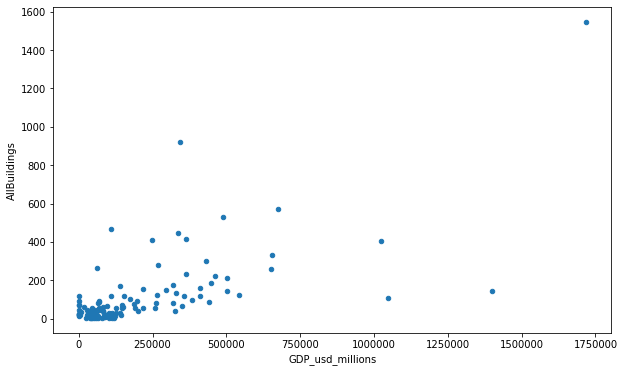

In [82]:
df.plot(x='GDP_usd_millions', y='AllBuildings', kind='scatter',s=20,figsize=(10,6))

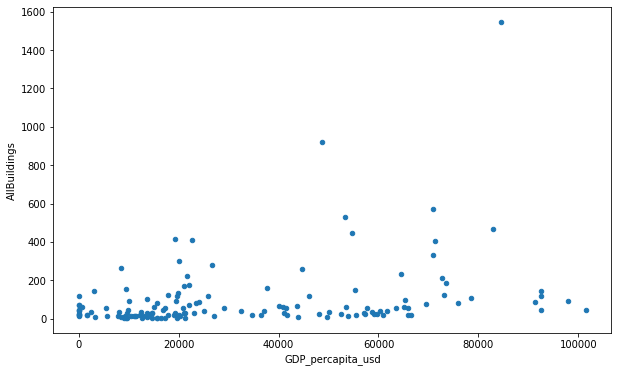

In [83]:
df.plot(x='GDP_percapita_usd', y='AllBuildings', kind='scatter',s=20,figsize=(10,6))

# US general

In [90]:
US=df[["GDP_usd_millions","AllBuildings",'GDP_percapita_usd']][df["Country"]=="United States"]

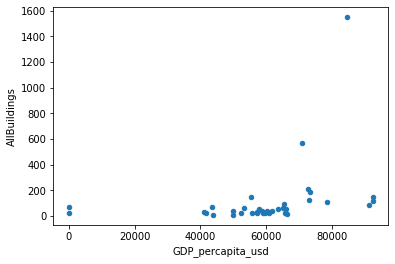

In [88]:
US.plot(x='GDP_percapita_usd', y='AllBuildings', kind='scatter',s=20)

# China general

In [84]:
CHINA=df[["GDP_usd_millions","AllBuildings",'GDP_percapita_usd','Province']][df["Country"]=="China"]

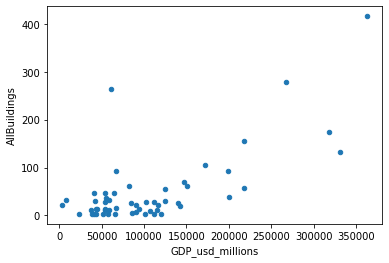

In [85]:
CHINA.plot(x='GDP_usd_millions', y='AllBuildings', kind='scatter',s=20)

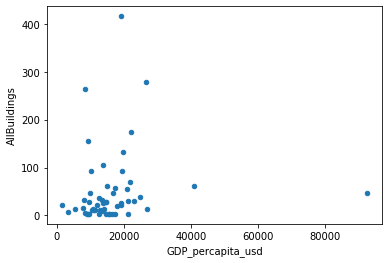

In [86]:
CHINA.plot(x='GDP_percapita_usd', y='AllBuildings', kind='scatter',s=20)

In [102]:
CHINA.groupby(by='Province').AllBuildings.sum().sort_values(ascending=[False])
#need to add province GDP

Province
Guangdong    497
Shanghai     416
Guangxi      311
Chongqing    155
Liaoning     155
Jiangsu      138
Beijing      132
Sichuan      105
Hubei         92
Zhejiang      83
Fujian        74
Tianjin       58
Shandong      56
Hunan         55
Macau         47
Shanxi        36
Jiangxi       32
Yunnan        28
Anhui         26
Shaanxi       21
Hebei         16
Henan         12
Guizhou       12
Gansu         12
Name: AllBuildings, dtype: int64

# china and the world

# china and the US

# china and europe